In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn; seaborn.set()
from sklearn.metrics import mean_squared_error
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15,6
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.arima_model import ARIMA

**Loading  Data and study the rows and column values**

In [2]:
data = pd.read_csv("C:/Users/rohit/OneDrive/Documents/rice price_CSV.csv")
print(data.head(5))
print(data.tail(5))
data.dtypes
data.info()
data.describe()

           Date   Price    Open    High     Low Volume    Chg%
0  Apr 22, 2022  16.205  16.200  16.270  16.105      0  -0.15%
1  Apr 21, 2022  16.230  16.205  16.280  16.080  0.78K   1.09%
2  Apr 20, 2022  16.055  16.150  16.245  16.005  0.80K  -0.06%
3  Apr 19, 2022  16.065  16.570  17.000  15.690  1.49K  -2.93%
4  Apr 18, 2022  16.550  16.160  16.700  16.140  0.86K   2.19%
              Date   Price    Open   High     Low Volume    Chg%
1027  Apr 02, 2018  12.310  12.375  12.46  12.275  0.47K  -0.36%
1028  Mar 29, 2018  12.355  12.425  12.47  12.335  0.48K  -0.72%
1029  Mar 28, 2018  12.445  12.465  12.52  12.430  0.46K   0.00%
1030  Mar 27, 2018  12.445  12.420  12.50  12.395  0.30K  -0.12%
1031  Mar 26, 2018  12.460  12.370  12.47  12.340  0.35K   0.81%
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1032 entries, 0 to 1031
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1032 non-null   object 
 1   Price   10

,Price,Open,High,Low
count,1032.000000,1032.000000,1032.000000,1032.000000
mean,12.695923,12.690032,12.804110,12.585925
std,1.688250,1.666922,1.720653,1.630086
min,9.780000,9.785000,9.845000,9.660000
25%,11.588750,11.608750,11.695000,11.487500
50%,12.510000,12.485000,12.592500,12.430000
75%,13.481250,13.463500,13.592500,13.396250
max,22.065000,22.210000,23.565000,20.630000


Date is to be in Date-time format inorder to perform a time series study. In the current dataset the date is stated as an object which  is to be converted by parsing through the read-csv command  

In [3]:
data = pd.read_csv("C:/Users/rohit/OneDrive/Documents/rice price_CSV.csv",index_col= 'Date')
print(data.head(5)) 
data.info()
data.index = pd.to_datetime(data.index)
print(data.index)
data.head(5)

               Price    Open    High     Low Volume    Chg%
Date                                                       
Apr 22, 2022  16.205  16.200  16.270  16.105      0  -0.15%
Apr 21, 2022  16.230  16.205  16.280  16.080  0.78K   1.09%
Apr 20, 2022  16.055  16.150  16.245  16.005  0.80K  -0.06%
Apr 19, 2022  16.065  16.570  17.000  15.690  1.49K  -2.93%
Apr 18, 2022  16.550  16.160  16.700  16.140  0.86K   2.19%
<class 'pandas.core.frame.DataFrame'>
Index: 1032 entries, Apr 22, 2022 to Mar 26, 2018
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Price   1032 non-null   float64
 1   Open    1032 non-null   float64
 2   High    1032 non-null   float64
 3   Low     1032 non-null   float64
 4   Volume  1032 non-null   object 
 5   Chg%    1032 non-null   object 
dtypes: float64(4), object(2)
memory usage: 56.4+ KB
DatetimeIndex(['2022-04-22', '2022-04-21', '2022-04-20', '2022-04-19',
               '2022-04-18', '2022-04-14

,Price,Open,High,Low,Volume,Chg%
Date,,,,,,
2022-04-22,16.205,16.200,16.270,16.105,0,-0.15%
2022-04-21,16.230,16.205,16.280,16.080,0.78K,1.09%
2022-04-20,16.055,16.150,16.245,16.005,0.80K,-0.06%
2022-04-19,16.065,16.570,17.000,15.690,1.49K,-2.93%
2022-04-18,16.550,16.160,16.700,16.140,0.86K,2.19%


Now sort the dataset from oldest - recent 

In [4]:
data = data.sort_index()
data.head()

,Price,Open,High,Low,Volume,Chg%
Date,,,,,,
2018-03-26,12.460,12.370,12.47,12.340,0.35K,0.81%
2018-03-27,12.445,12.420,12.50,12.395,0.30K,-0.12%
2018-03-28,12.445,12.465,12.52,12.430,0.46K,0.00%
2018-03-29,12.355,12.425,12.47,12.335,0.48K,-0.72%
2018-04-02,12.310,12.375,12.46,12.275,0.47K,-0.36%


Text(0, 0.5, 'Daily price')

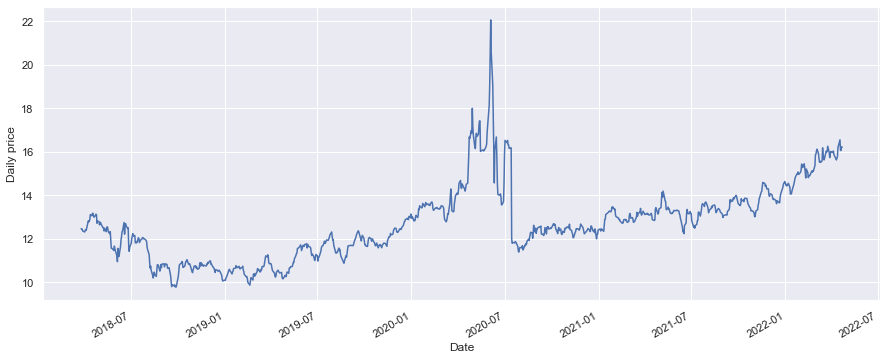

In [5]:
data['Price'].plot()
plt.ylabel("Daily price")

In this model I am trying to predict the Closing price of Rice, and so I create a new object eliminating other columns

In [6]:
data = data['Price']

Text(0, 0.5, 'Weekly price')

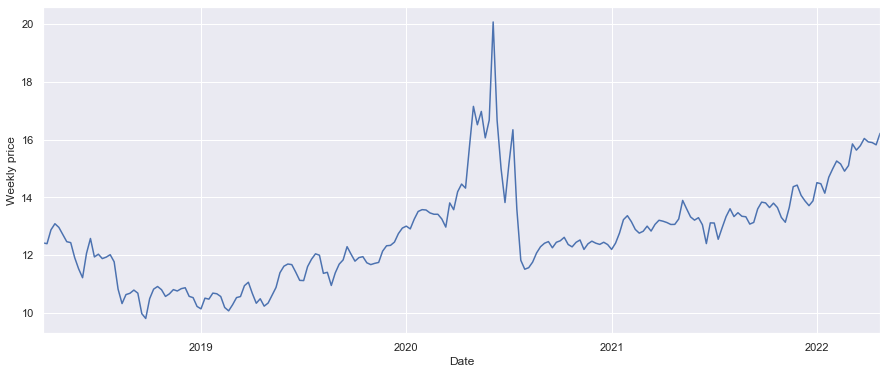

In [7]:
weekly = data.resample('W').mean()
weekly.plot()
plt.ylabel('Weekly price')


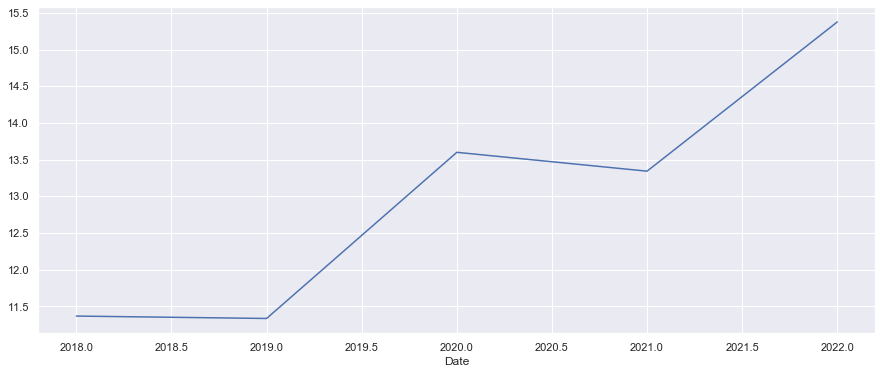

In [8]:
by_year = data.groupby(data.index.year).mean()
by_year.plot()

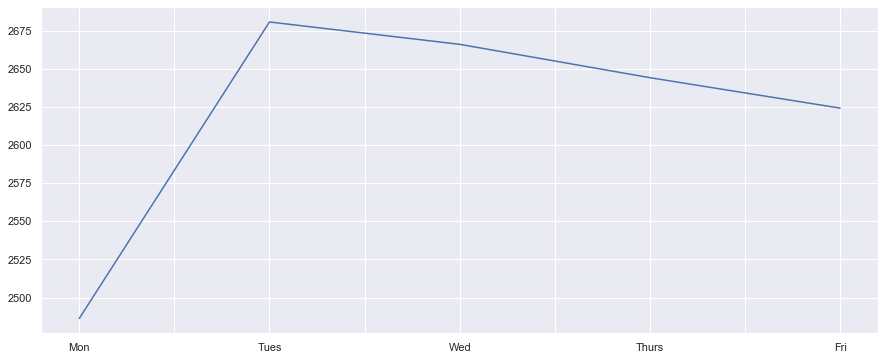

In [9]:
by_weekday = data.groupby(data.index.dayofweek).sum()
by_weekday.index = ['Mon', 'Tues', 'Wed', 'Thurs', 'Fri','Sat','Sun'][:len(by_weekday)]
by_weekday.plot()

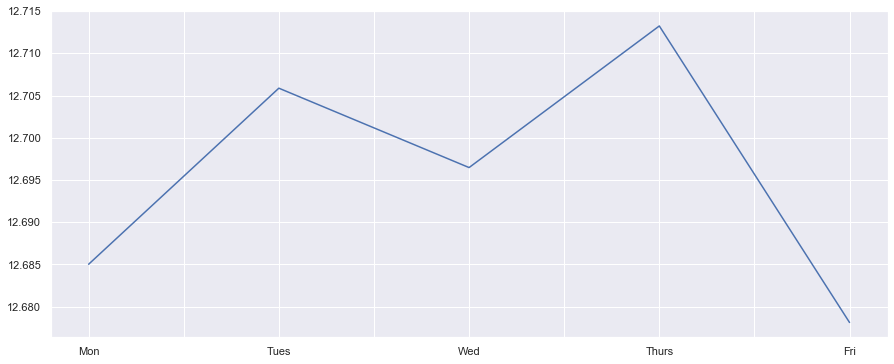

In [10]:
by_weekday = data.groupby(data.index.dayofweek).mean()
by_weekday.index = ['Mon', 'Tues', 'Wed', 'Thurs', 'Fri','Sat','Sun'][:len(by_weekday)]
by_weekday.plot()

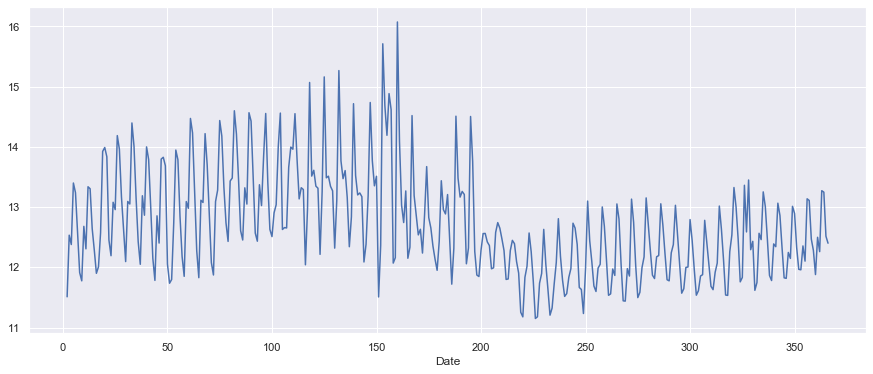

In [11]:
by_day = data.groupby(data.index.dayofyear).mean()
by_day.plot()

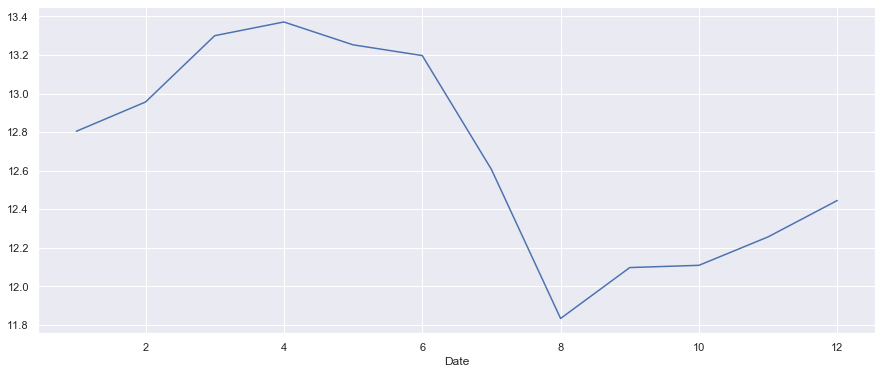

In [12]:
by_month = data.groupby(data.index.month).mean()
by_month.plot()

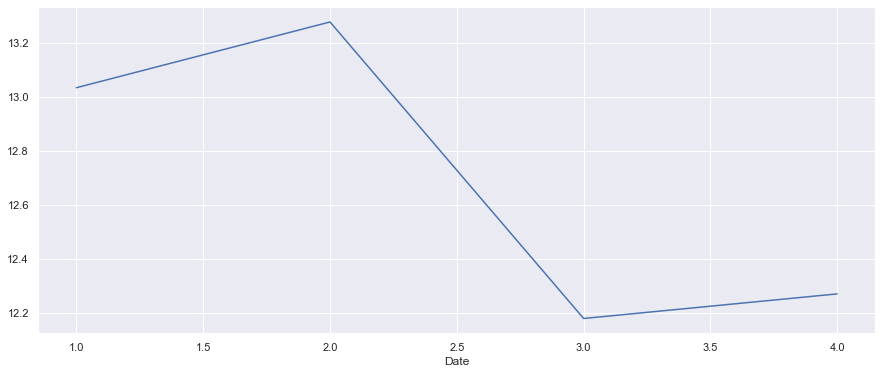

In [13]:
by_quarter = data.groupby(data.index.quarter).mean()
by_quarter.plot()

Date
1    AxesSubplot(0.125,0.2;0.775x0.68)
2    AxesSubplot(0.125,0.2;0.775x0.68)
3    AxesSubplot(0.125,0.2;0.775x0.68)
4    AxesSubplot(0.125,0.2;0.775x0.68)
Name: Price, dtype: object

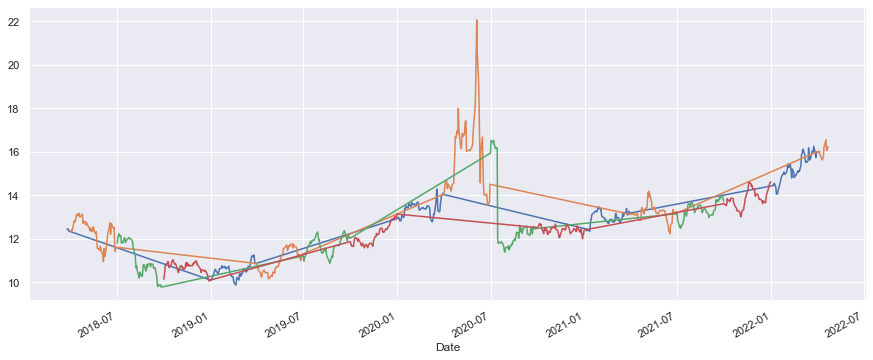

In [14]:
by_quarter = data.groupby(data.index.quarter)
by_quarter.plot()

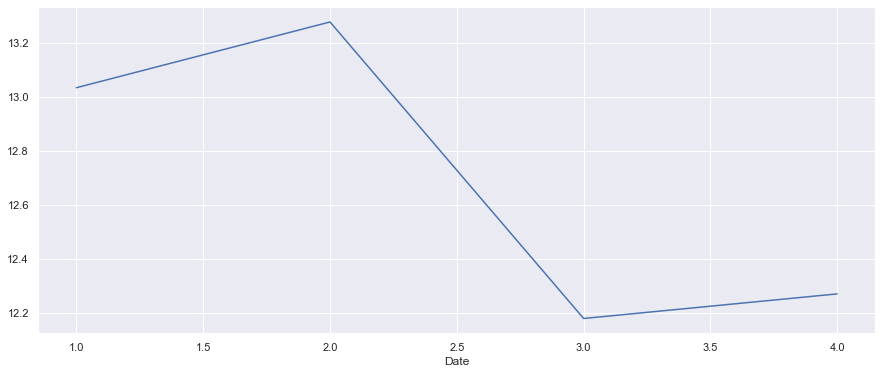

In [15]:
by_quarter_overall = data.groupby(data.index.quarter).mean()
by_quarter_overall.plot()

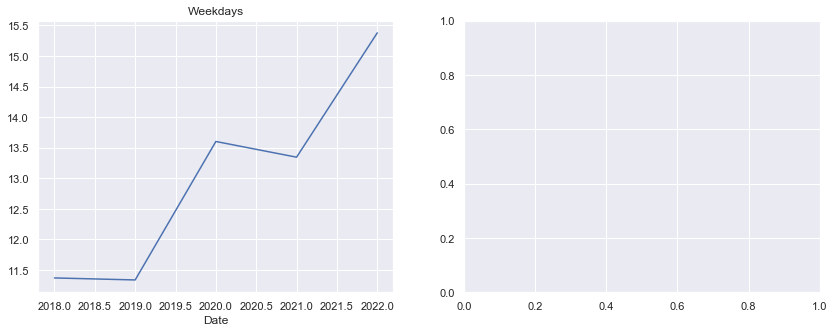

In [16]:
weekend = np.where(data.index.weekday < 5, 'Weekday', 'Weekend')
by_time = data.groupby([weekend, data.index.year]).mean()
fig, ax = plt.subplots(1, 2, figsize=(14, 5))
by_time.loc['Weekday'].plot(ax=ax[0], title='Weekdays')
#by_time.loc['Weekend'].plot(ax=ax[1], title='Weekends')

In [17]:
ts = data

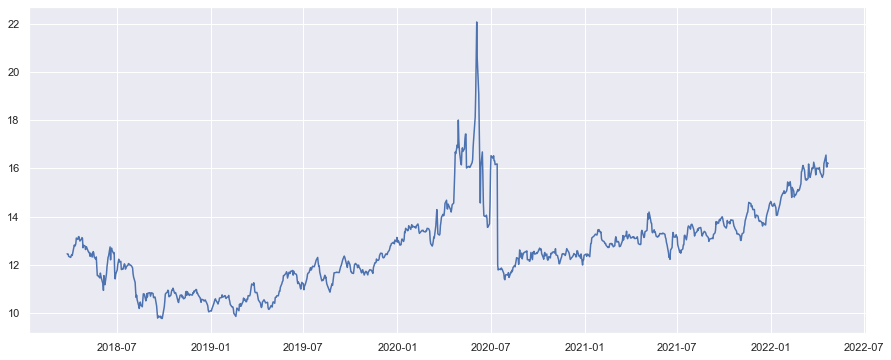

In [18]:
plt.plot(ts)

In [19]:
from statsmodels.tsa.stattools import adfuller
def test_for_stationary(input_data):
    r_mean = input_data.rolling(window = 7,center=False).mean()
    r_std = input_data.rolling(window = 7,center=False).std()
    
    # plotting the data
    given = plt.plot(input_data, color = 'blue', label = 'given_series')
    rolling_mean = plt.plot(r_mean, color = 'red', label = 'rolling_mean')
    rolling_std = plt.plot(r_std, color ='green', label = 'rolling_std')
    plt.legend(loc = 'best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
     #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(input_data)
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)
    return dfoutput 

### The test statistic is very large compared to the crtical value. The above series show that rolling mean value varies  with time and is not stationary. The series needs to be Stationarized. we need to eliminate the trend and seasonality from the series to make it stationary


# Transforming the data - (to eliminate trend)

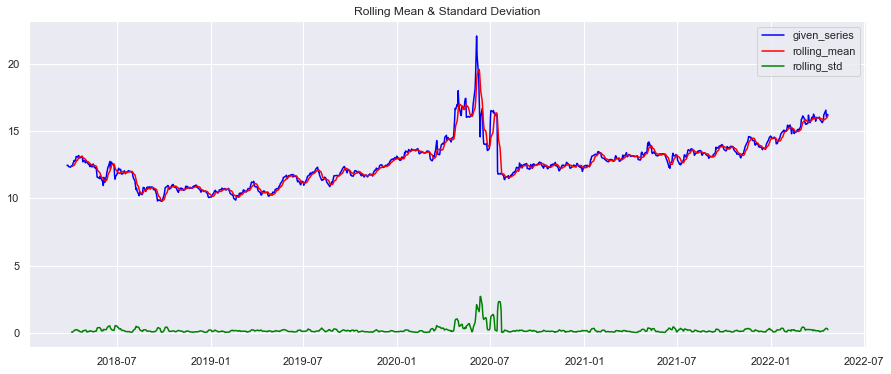

Results of Dickey-Fuller Test:
Test Statistic                   -0.737502
p-value                           0.836795
#Lags Used                       22.000000
Number of Observations Used    1009.000000
Critical Value (1%)              -3.436848
Critical Value (5%)              -2.864409
Critical Value (10%)             -2.568297
dtype: float64


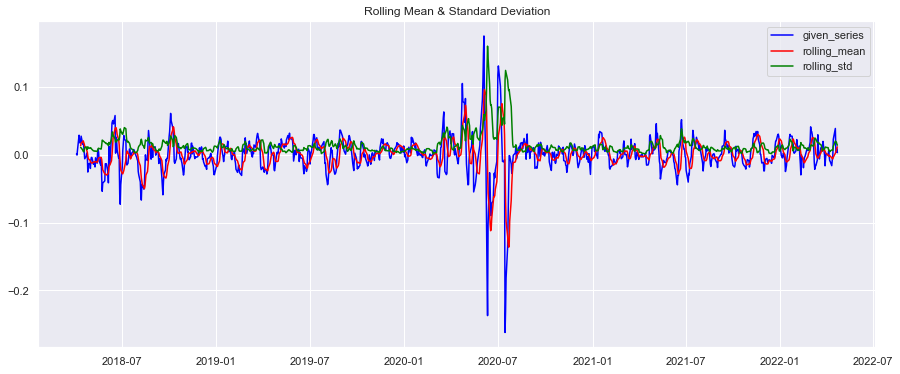

Results of Dickey-Fuller Test:
Test Statistic                   -5.432229
p-value                           0.000003
#Lags Used                       22.000000
Number of Observations Used    1003.000000
Critical Value (1%)              -3.436887
Critical Value (5%)              -2.864426
Critical Value (10%)             -2.568307
dtype: float64
1


In [54]:
result=test_for_stationary(ts) 
d1=0
if(result[1]>0.05):
    d1+=1
    #Smoothing by Rolling average
    ts_logtransformed = np.log(ts)
    Rolling_average = ts_logtransformed.rolling(window = 7, center= False).mean()
    log_Rolling_difference = ts_logtransformed - Rolling_average
    log_Rolling_difference.dropna(inplace=True)
    result=test_for_stationary(log_Rolling_difference)
    if(result[1]>0.05):
        d1+=1
        #Use exponential_weighted_moving_average instead of moving average to improve the solution
        expwighted_avg = ts_logtransformed.ewm(halflife=len(data),min_periods=0,adjust=True,ignore_na=False).mean()
        log_expmovwt_diff = ts_logtransformed - expwighted_avg
        if(test_for_stationary(log_expmovwt_diff)[1]>0.05):
            d1+=1
            print("Data cant be made stationary")
print(d1)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=121.407, Time=0.30 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=177.626, Time=0.16 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=119.699, Time=0.11 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=121.936, Time=0.28 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=175.822, Time=0.06 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=121.273, Time=0.09 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=104.140, Time=1.12 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=104.260, Time=1.22 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=104.154, Time=0.66 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=125.931, Time=0.39 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=120.016, Time=0.23 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=1.26 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=102.543, Time=0.33 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=119.530, Time=0.17 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=119.398, 

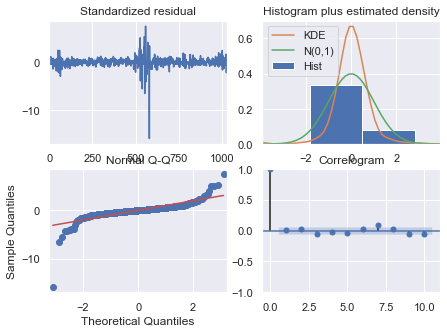

In [68]:
from statsmodels.tsa.arima_model import ARIMA
import pmdarima as pm

if(d1==0):
    df=ts
elif(d1==1):
    df=log_Rolling_difference
else:
    df=log_expmovwt_diff

model = pm.auto_arima(data.values, start_p=1, start_q=1,test='adf',max_p=3, max_q=3,m=1,d=None,seasonal=False,start_P=0, D=d1, trace=True,error_action='ignore',  suppress_warnings=True, stepwise=True)

print(model.summary())
model.plot_diagnostics(figsize=(7,5))
plt.show()


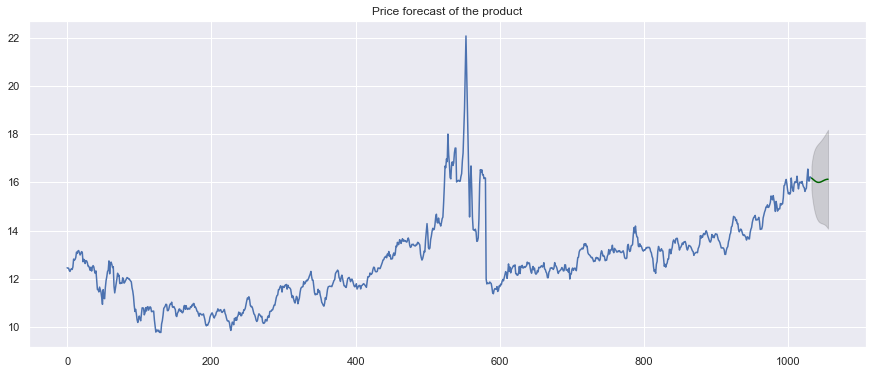

In [74]:
# Forecast
n_periods = 24
df=data
fc, confint = model.predict(n_periods=n_periods, return_conf_int=True)
index_of_fc = np.arange(len(df.values), len(df.values)+n_periods)

# make series for plotting purpose
fc_series = pd.Series(fc, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# Plot
plt.plot(df.values)
plt.plot(fc_series, color='darkgreen')
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15)

plt.title("Price forecast of the product")
plt.show()